# Imports

In [9]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
# from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
import h5py
# from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent


# Read cat vs non-cat Data

In [12]:
train_dataset = h5py.File('../dataset/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set imagenes
train_set_y = np.array(train_dataset["train_set_y"][:]).reshape(train_set_x_orig.shape[0], 1) # train set etiquetas

test_dataset = h5py.File('../dataset/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set imagenes
test_set_y = np.array(test_dataset["test_set_y"][:]).reshape(test_set_x_orig.shape[0], 1) # test set etiquetas

print('test images:', test_set_x_orig.shape)
print('train images:', train_set_x_orig.shape)
print('train tags:', train_set_y.shape)

test images: (50, 64, 64, 3)
train images: (209, 64, 64, 3)
train tags: (209, 1)


Visualize one image


y = [1]


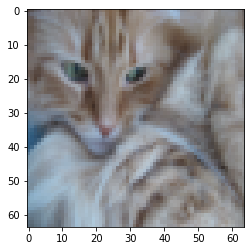

In [13]:
index = 2
plt.imshow(train_set_x_orig[index])
print (f"y = {train_set_y[index]}")

Convert the input to a one-dimensional array by grouping all the bits in an array sequentially. and normalize the pixels


In [15]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

train_set_x_flatten = train_set_x_flatten/255.0
test_set_x_flatten = test_set_x_flatten/255.0

#transpose the data
train_set_x_flatten = train_set_x_flatten.T
train_set_y = train_set_y.T
test_set_x_flatten = test_set_x_flatten.T
test_set_y = test_set_y.T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


**Salida Esperada**: 

<table style="width:35%">
  <tr>
    <td>train_set_x_flatten shape</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>train_set_y shape</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>test_set_x_flatten shape</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>test_set_y shape</td>
    <td>(1, 50)</td> 
  </tr>
</table>

# Neural Network


In [16]:
def layer_sizes(X, Y ):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]
    n_y = Y.shape[0]
    n_h = 4

    return (n_x,n_h, n_y)


In [17]:
(n_x, n_h, n_y ) = layer_sizes(train_set_x_flatten, train_set_y)

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 12288
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


Initialize parameters

In [18]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)

    W1 = np.random.rand(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h,1))
    W2 = np.random.rand(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y,1))

    #verify
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
